In [1]:
# Imports
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/thomassimmons/c/d/datasets/retail_store_sales.csv")

In [3]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [11]:
df.isnull().sum()

transaction_id      0
customer_id         0
category            0
item                0
price_per_unit      0
quantity            0
total_spent         0
payment_method      0
location            0
transaction_date    0
discount_applied    0
dtype: int64

In [5]:
df.shape

(12575, 11)

In [8]:
df.columns

Index(['transaction_id', 'customer_id', 'category', 'item', 'price_per_unit',
       'quantity', 'total_spent', 'payment_method', 'location',
       'transaction_date', 'discount_applied'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

In [12]:
df = df.dropna(subset = ['item', 'price_per_unit', 'quantity', 'total_spent', 'discount_applied'])

In [16]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

In [17]:
df['month'] = df['transaction_date'].dt.to_period("M")

In [18]:
print("Data types:\n", df.dtypes)

Data types:
 transaction_id              object
customer_id                 object
category                    object
item                        object
price_per_unit             float64
quantity                   float64
total_spent                float64
payment_method              object
location                    object
transaction_date    datetime64[ns]
discount_applied            object
month                    period[M]
dtype: object


In [19]:
df['month']

0        2024-04
1        2023-07
2        2022-10
4        2022-10
6        2023-06
          ...   
12566    2023-05
12567    2023-03
12569    2024-05
12571    2022-08
12573    2023-12
Name: month, Length: 7579, dtype: period[M]

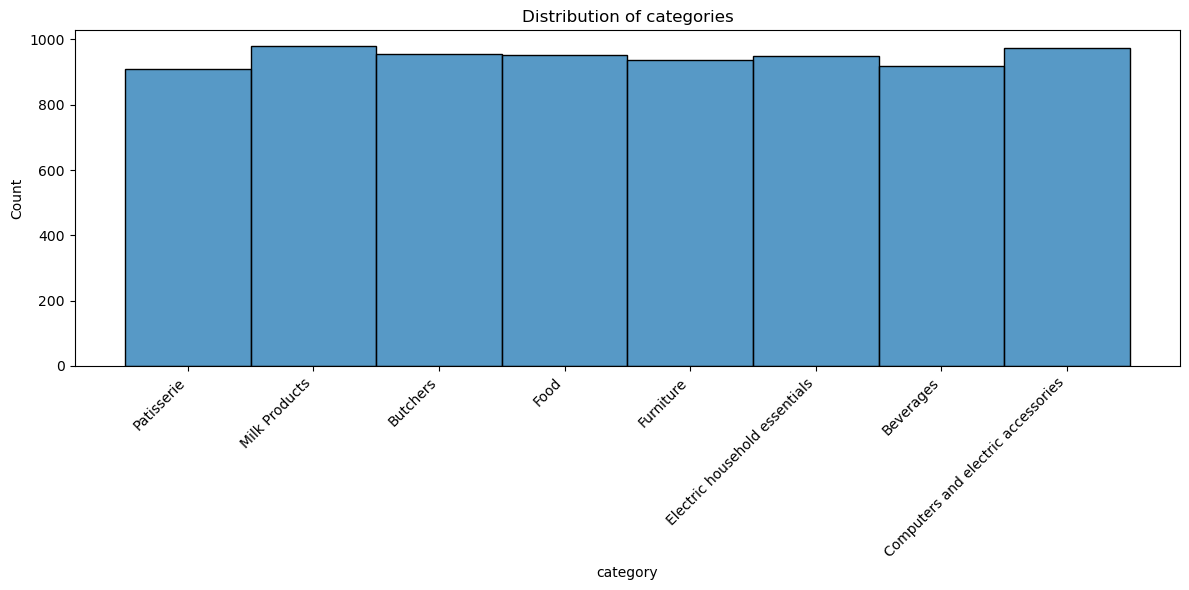

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df['category'])
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of categories")
plt.tight_layout()
plt.show()

In [25]:
print("Dataframe columns:\n", df.columns)
print("\nData types:\n", df.dtypes)

Dataframe columns:
 Index(['transaction_id', 'customer_id', 'category', 'item', 'price_per_unit',
       'quantity', 'total_spent', 'payment_method', 'location',
       'transaction_date', 'discount_applied', 'month'],
      dtype='object')

Data types:
 transaction_id              object
customer_id                 object
category                    object
item                        object
price_per_unit             float64
quantity                   float64
total_spent                float64
payment_method              object
location                    object
transaction_date    datetime64[ns]
discount_applied            object
month                    period[M]
dtype: object


In [27]:
df.describe(include='all')

,transaction_id,customer_id,category,item,price_per_unit,quantity,total_spent,payment_method,location,transaction_date,discount_applied,month
count,7579,7579,7579,7579,7579.000000,7579.000000,7579.000000,7579,7579,7579,7579,7579
unique,7579,25,8,200,NaN,NaN,NaN,3,2,NaN,2,37
top,TXN_6867343,CUST_05,Milk Products,Item_11_MILK,NaN,NaN,NaN,Cash,Online,NaN,True,2022-01
freq,1,352,979,80,NaN,NaN,NaN,2583,3835,NaN,3801,242
mean,NaN,NaN,NaN,NaN,23.428882,5.557329,130.427893,NaN,NaN,2023-07-11 13:57:42.250956544,NaN,NaN
min,NaN,NaN,NaN,NaN,5.000000,1.000000,5.000000,NaN,NaN,2022-01-01 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,NaN,14.000000,3.000000,52.000000,NaN,NaN,2022-09-27 00:00:00,NaN,NaN
50%,NaN,NaN,NaN,NaN,23.000000,6.000000,110.000000,NaN,NaN,2023-07-09 00:00:00,NaN,NaN
75%,NaN,NaN,NaN,NaN,33.500000,8.000000,192.000000,NaN,NaN,2024-04-28 00:00:00,NaN,NaN
max,NaN,NaN,NaN,NaN,41.000000,10.000000,410.000000,NaN,NaN,2025-01-18 00:00:00,NaN,NaN


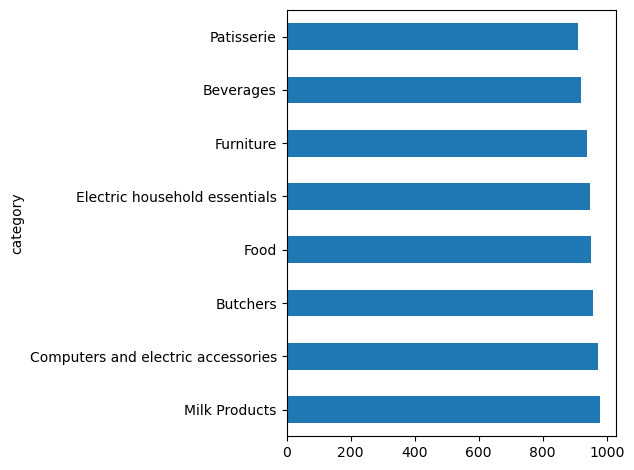

In [33]:
df['category'].value_counts().plot(kind='barh')
plt.tight_layout()
plt.show()